In [2]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler,StandardScaler


datasets = pd.read_csv('Exercise-CarData.csv') 
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())



Data :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]

Data statistics
         Unnamed: 0         Price  ...           CC      Weight
count  1

In [3]:
X = datasets.iloc[:,:-1] # All rows All columns except last column
Y = datasets.iloc[:,-1]  # All rows of only last column
X

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3
...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3


In [4]:
datasets.dropna(axis=0,how="all",inplace=True) #Remove rows with all null values
datasets

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [5]:
datasets = datasets.replace({
    "??":np.NaN,
    "????":np.NaN,
    "three":'3',
    "five":'5',
    "seven":'7'
})

datasets

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,NaN,86,1.0,0,1300,3,1015


In [6]:
updated_data = datasets
updated_data['Age'] = updated_data['Age'].fillna(updated_data['Age'].mean())
updated_data['MetColor'] = updated_data['MetColor'].fillna("No Color")
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1421 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   object 
 6   MetColor    1436 non-null   object 
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 134.6+ KB


In [7]:
datasets['KM'] = datasets['KM'].astype(float)
updated_data['KM'] = updated_data['KM'].fillna(updated_data['KM'].mean())
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   object 
 6   MetColor    1436 non-null   object 
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 134.6+ KB


In [8]:
mostFrequent = datasets['FuelType'].value_counts().index[0]
datasets['FuelType'] = datasets['FuelType'].fillna(mostFrequent)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   float64
 4   FuelType    1436 non-null   object 
 5   HP          1430 non-null   object 
 6   MetColor    1436 non-null   object 
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 134.6+ KB


**Using SimpleImputer**

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 

datasets = pd.read_csv("Exercise-CarData.csv")

In [10]:
datasets = datasets.replace({
    "??":np.NaN,
    "????":np.NaN,
    "three":'3',
    "five":'5',
    "seven":'7'
})
datasets

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,NaN,86,1.0,0,1300,3,1015


In [11]:
X = datasets.iloc[:,:-1]
Y = datasets.iloc[:,-1]

In [12]:
new_X = datasets.iloc[:, :-1].values 
new_Y = datasets.iloc[:, -1].values
# updated_data['Age'] = updated_data['Age'].fillna(updated_data['Age'].mean())
imputer = SimpleImputer(missing_values = np.nan,strategy="most_frequent")
imputer = imputer.fit(new_X[:, 1:11])
print(new_X)
new_X[:, 1:11] = imputer.transform(new_X[:, 1:11])
print("\n Data after Most Frequent Value for NaN : \n", new_X)

[[0 13500 23.0 ... 0 2000 '3']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]

 Data after Most Frequent Value for NaN : 
 [[0 13500 23.0 ... 0 2000 '3']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 65.0 ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


      Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  Weight
0     13500  23.0  46986   Diesel   90       1.0          0  2000     3    1165
1     13750  23.0  72937   Diesel   90       1.0          0  2000     3    1165
2     13950  24.0  41711   Diesel   90       NaN          0  2000     3    1165
3     14950  26.0  48000   Diesel   90       0.0          0  2000     3    1165
4     13750  30.0  38500   Diesel   90       0.0          0  2000     3    1170
...     ...   ...    ...      ...  ...       ...        ...   ...   ...     ...
1431   7500   NaN  20544   Petrol   86       1.0          0  1300     3    1025
1432  10845  72.0    NaN   Petrol   86       0.0          0  1300     3    1015
1433   8500   NaN  17016   Petrol   86       0.0          0  1300     3    1015
1434   7250  70.0    NaN      NaN   86       1.0          0  1300     3    1015
1435   6950  76.0      1   Petrol  110       0.0          0  1600     5    1114

[1436 rows x 10 columns]


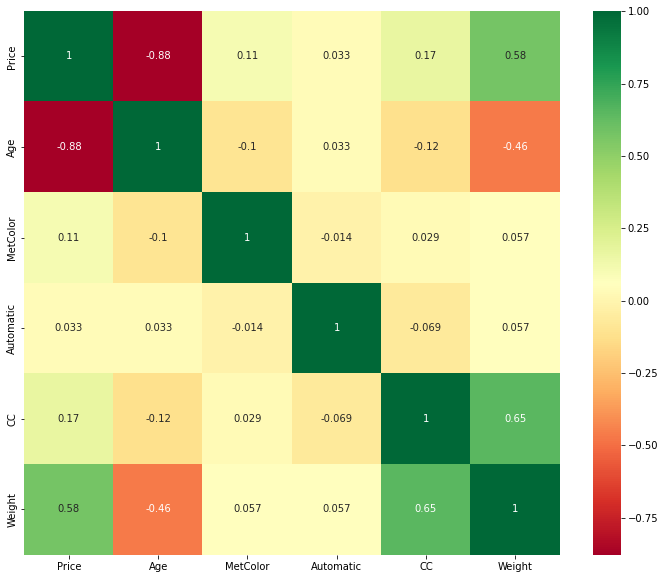

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

new_datasets = datasets.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
print(datasets)

corr = datasets.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="RdYlGn")

In [15]:
columns = np.full((len(datasets.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = datasets.columns[columns]
print(selected_columns)

Index(['Price', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight'],
      dtype='object')
